# NVIDIA Corp Share price 2000-2024

## Proje, Nvidia Corporation'ın günlük hisse senedi verilerini analiz etmek üzere oluşturulmuştur. Bu veri analizi projesi, veri setinin temizlenmesi, incelenmesi, görselleştirilmesi ve analiz edilmesini içerir.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bu adımda pandas, numpy, matplotlib ve seaborn kütüphaneleri yüklenir. Pandas ve numpy veri manipülasyonu için, matplotlib ve seaborn ise görselleştirme için kullanılır.


In [4]:
df = pd.read_csv("NVDA.csv")
#NVDA.csv dosyası pandas DataFrame olarak yüklenir.

### Veri Setinin Genel Bilgileri ve İstatistiksel Özeti

In [5]:
print("Veri Setinin Genel Bilgileri:")
print(df.info())

print("\nVeri Setinin İstatistiksel Özeti:")
print(df.describe())


Veri Setinin Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6116 entries, 0 to 6115
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6116 non-null   object 
 1   Open       6116 non-null   float64
 2   High       6116 non-null   float64
 3   Low        6116 non-null   float64
 4   Close      6116 non-null   float64
 5   Adj Close  6116 non-null   float64
 6   Volume     6116 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.6+ KB
None

Veri Setinin İstatistiksel Özeti:
              Open         High          Low        Close    Adj Close  \
count  6116.000000  6116.000000  6116.000000  6116.000000  6116.000000   
mean     53.052266    54.017201    52.031700    53.064741    52.794253   
std     121.267334   123.423982   118.835114   121.183234   121.214864   
min       0.608333     0.656667     0.600000     0.614167     0.563377   
25%       2.959688     3.02750

### Eksik Verilerin Kontrolü ve İşlenmesi

In [9]:
print("Eksik veya Bozuk Veri Sayısı:")
print(df.isnull().sum())

# Eksik verilerin doldurulması
df.fillna(method='ffill', inplace=True)

# isnull().sum() ile her sütundaki eksik veri sayısı hesaplanır. fillna(method='ffill') yöntemi ile eksik veriler bir önceki satırdaki değerle doldurulur.


Eksik veya Bozuk Veri Sayısı:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Aykırı Değerlerin Tespiti ve İşlenmesi

In [12]:
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
print("\nAykırı Değerler:")
print(outliers)

# Aykırı değerlerin kaldırılması
df = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]

### Aykırı değerler IQR (Interquartile Range) yöntemi ile tespit edilir ve filtrelenir.



Aykırı Değerler:
            Date       Open       High        Low      Close  Adj Close  \
1926  2007-08-31   8.283333   8.558333   8.238333   8.526667   7.821530   
1927  2007-09-04   8.565000   8.826667   8.431667   8.790000   8.063087   
1928  2007-09-05   8.751667   9.000000   8.716667   8.723333   8.001931   
1929  2007-09-06   8.831667   8.911667   8.725000   8.761667   8.037096   
1932  2007-09-11   8.567500   8.710000   8.477500   8.645000   7.930077   
...          ...        ...        ...        ...        ...        ...   
4160  2016-07-18  13.337500  13.357500  13.192500  13.242500  13.008134   
4161  2016-07-19  13.235000  13.432500  13.210000  13.380000  13.143198   
4162  2016-07-20  13.425000  13.627500  13.370000  13.555000  13.315101   
4163  2016-07-21  13.525000  13.567500  13.260000  13.305000  13.069525   
4164  2016-07-22  13.352500  13.667500  13.255000  13.667500  13.425610   

        Volume  
1926  72083400  
1927  68326800  
1928  65627400  
1929  4254960

## Temel İstatistikler ve Korelasyon Matrisi

In [14]:
print("\nVeri Setinin Temel İstatistikleri:")
print(df.describe())

correlation_matrix = df.corr()
print("\nKorelasyon Matrisi:")
print(correlation_matrix)

###Temel istatistikler ve korelasyon matrisi hesaplanır. Korelasyon matrisi değişkenler arasındaki ilişkiyi gösterir.



Veri Setinin Temel İstatistikleri:
              Open         High          Low        Close    Adj Close  \
count  4024.000000  4024.000000  4024.000000  4024.000000  4024.000000   
mean      3.533173     3.604660     3.460442     3.532351     3.279431   
std       1.649539     1.667162     1.627919     1.648159     1.567417   
min       0.608333     0.656667     0.600000     0.614167     0.563377   
25%       2.239375     2.289375     2.163750     2.242500     2.057050   
50%       3.377083     3.449791     3.301042     3.367500     3.091690   
75%       4.630417     4.697500     4.565000     4.630625     4.350881   
max       8.937500     9.100000     8.395000     8.477500     8.305895   

             Volume  
count  4.024000e+03  
mean   6.853096e+07  
std    4.866735e+07  
min    4.564400e+06  
25%    3.780690e+07  
50%    5.798140e+07  
75%    8.470980e+07  
max    9.230856e+08  

Korelasyon Matrisi:
               Open      High       Low     Close  Adj Close    Volume
Open   

# Feature Engineering 

## Feature Engineering, bir veri kümesindeki mevcut özellikleri (değişkenleri) kullanarak yeni ve daha anlamlı özellikler oluşturma veya var olan özellikleri dönüştürme işlemidir. Bu, modelin performansını artırmak, daha iyi sonuçlar elde etmek ve daha iyi bir model anlayışı sağlamak için yapılır.

### Dağılım Analizi ve Korelasyon Isı Haritası

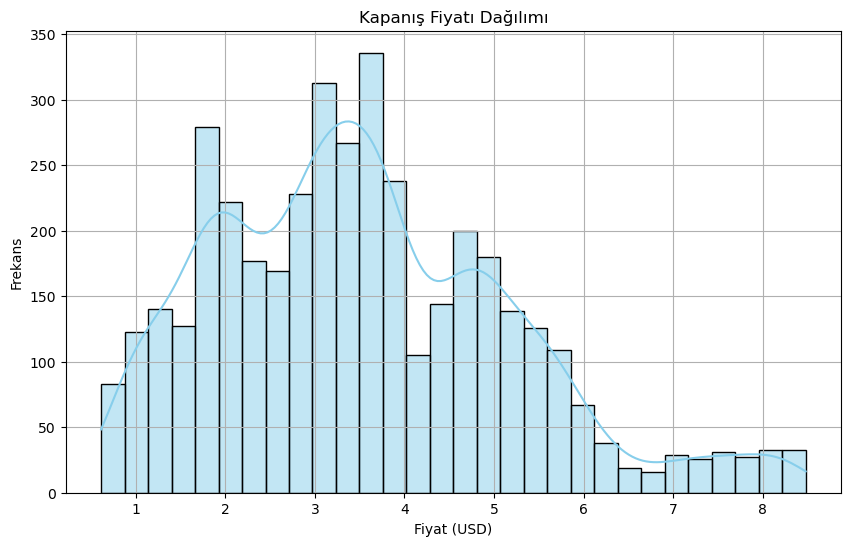

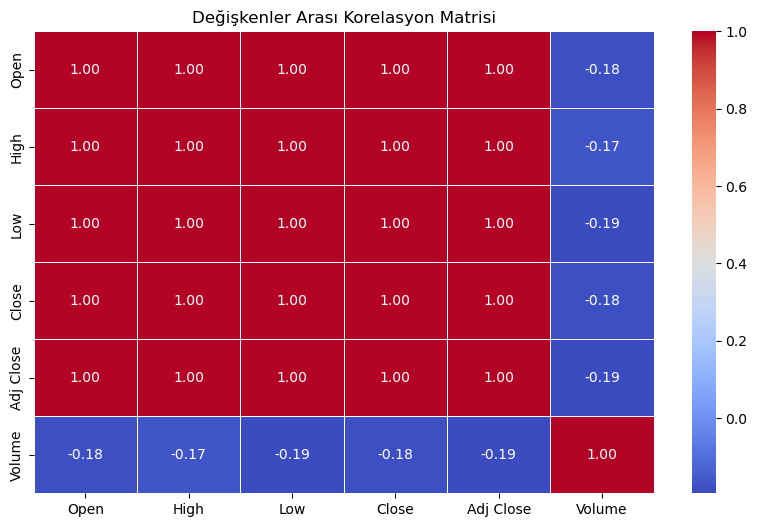

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Kapanış Fiyatı Dağılımı')
plt.xlabel('Fiyat (USD)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()


##Kapanış fiyatlarının histogramı ve korelasyon matrisinin ısı haritası çizilir.

### EDA (Exploratory Data Analysis - Keşifsel Veri Analizi), bir veri setini anlamak ve içindeki ilişkileri, desenleri ve anlamlı bilgileri ortaya çıkarmak için kullanılan bir süreçtir. EDA, veri setinin özelliklerini ve yapılarını keşfetmek, aykırı değerleri tanımlamak, eksik verileri ele almak, değişkenler arasındaki ilişkileri incelemek ve gelecek analizler ve modelleme için veri hazırlığı yapmak için kullanılır.

#### EDA'nın temel amacı, veri setinin içinde bulunan bilgiyi anlamak ve keşfetmektir. Bu, veri setinin genel özelliklerini anlamak için yapılan çeşitli görselleştirmeler ve istatistiksel analizler içerir. EDA sırasında, veri setinin dağılımını, merkezi eğilimini, değişkenler arasındaki ilişkileri ve olası örüntüleri görselleştirmek için histogramlar, kutu grafikleri, scatter plotlar gibi grafikler kullanılır.

### Zaman Serisi Analizi

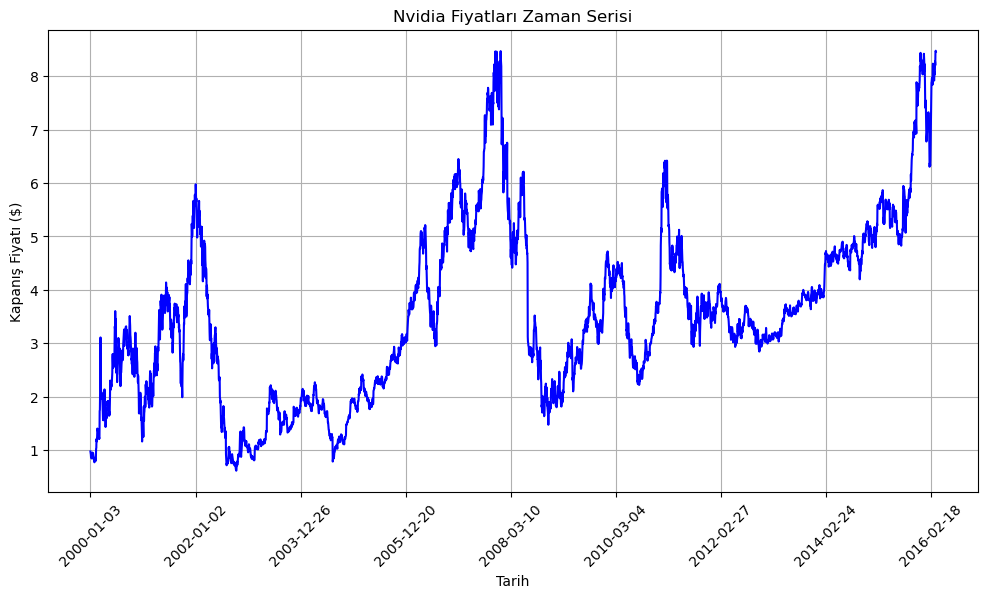

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue', linewidth=1.5)
plt.title('Nvidia Fiyatları Zaman Serisi')
plt.xlabel('Tarih')
plt.ylabel('Kapanış Fiyatı ($)')
plt.xticks(df['Date'][::500], rotation=45)
plt.grid(True)
plt.show()

## Zaman serisi grafiği, kapanış fiyatlarının zaman içindeki değişimini gösterir.

### Aylık ve Yıllık Ortalama Analizi

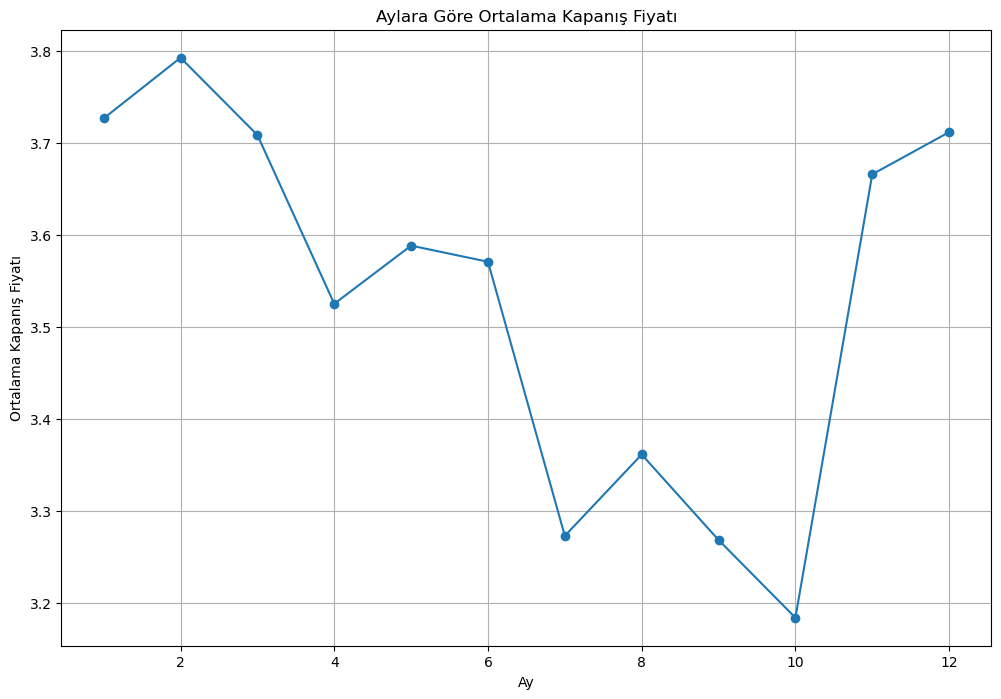

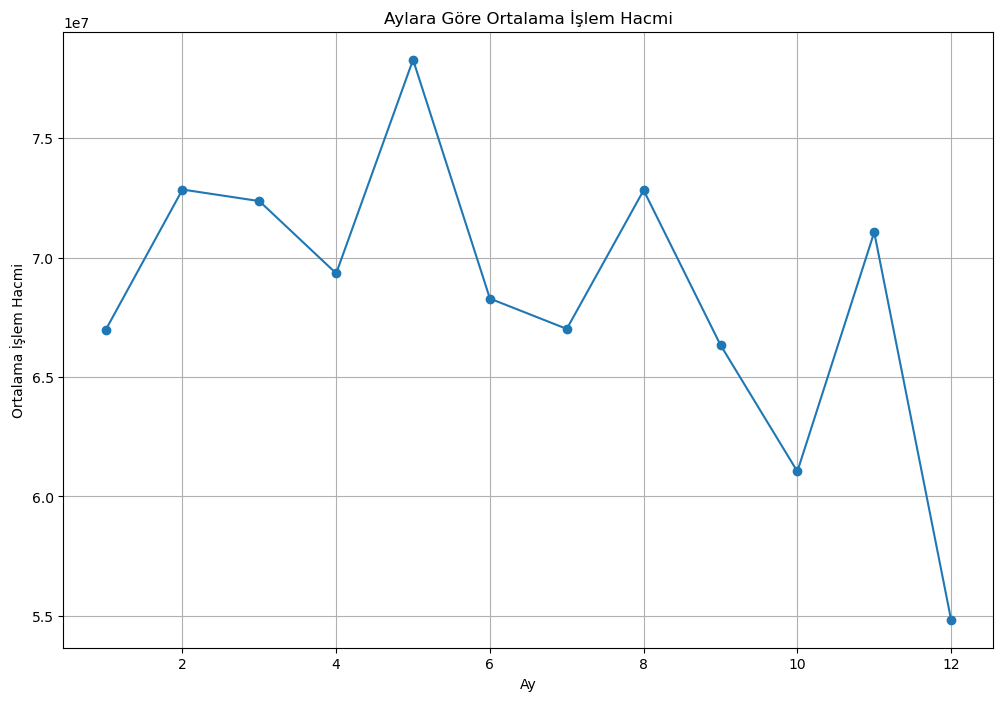

In [20]:
plt.figure(figsize=(12, 8))
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
monthly_avg_close = df.groupby('Month')['Close'].mean()
monthly_avg_close.plot(marker='o')
plt.xlabel('Ay')
plt.ylabel('Ortalama Kapanış Fiyatı')
plt.title('Aylara Göre Ortalama Kapanış Fiyatı')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
monthly_avg_volume = df.groupby('Month')['Volume'].mean()
monthly_avg_volume.plot(marker='o')
plt.xlabel('Ay')
plt.ylabel('Ortalama İşlem Hacmi')
plt.title('Aylara Göre Ortalama İşlem Hacmi')
plt.grid(True)
plt.show()

##Aylık ortalama kapanış fiyatları ve işlem hacimleri analiz edilir ve görselleştirilir.


### Ekstra Özelliklerin Hesaplanması

In [22]:
df['DailyChange'] = df['Close'] - df['Open']
df['AveragePrice'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
df['VolumeChange'] = df['Volume'].diff()

## Günlük fiyat değişimi, ortalama fiyat ve hacim değişimi gibi ekstra özellikler hesaplanır.


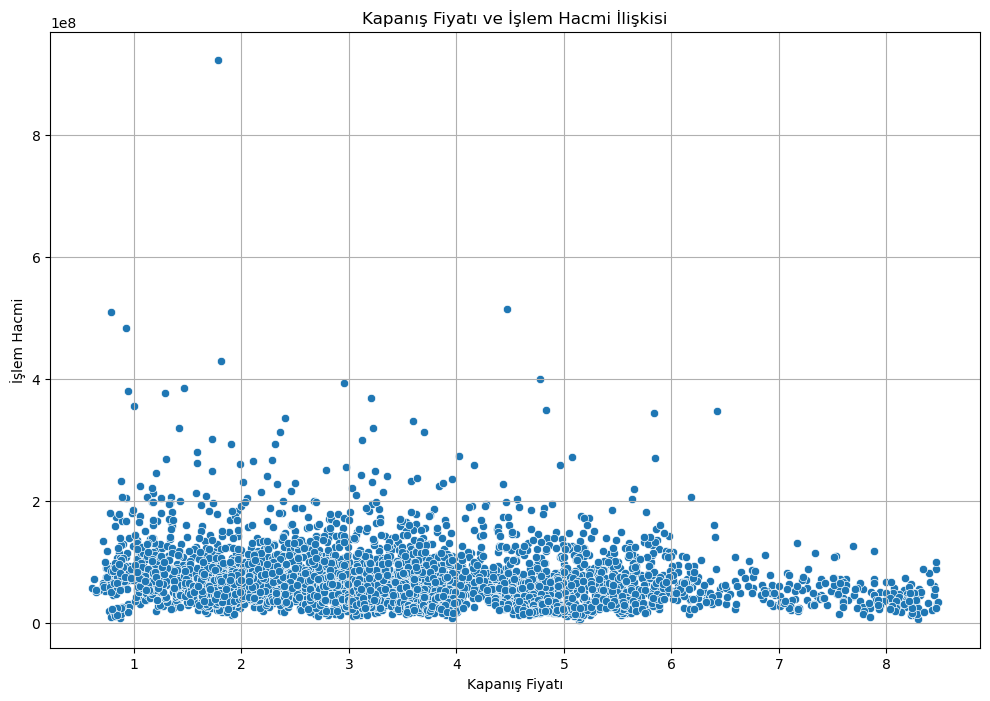

In [23]:
# Kapanış Fiyatı ve Hacim İlişkisi Scatter Plot
plt.figure(figsize=(12, 8))  # Figür boyutunu belirleme
sns.scatterplot(data=df, x='Close', y='Volume')  # Scatter plot oluşturma
plt.xlabel('Kapanış Fiyatı')  # X ekseni etiketini belirleme
plt.ylabel('İşlem Hacmi')  # Y ekseni etiketini belirleme
plt.title('Kapanış Fiyatı ve İşlem Hacmi İlişkisi')  # Grafiğin başlığını belirleme
plt.grid(True)  # Izgara eklemek
plt.show()  # Grafiği görüntüleme


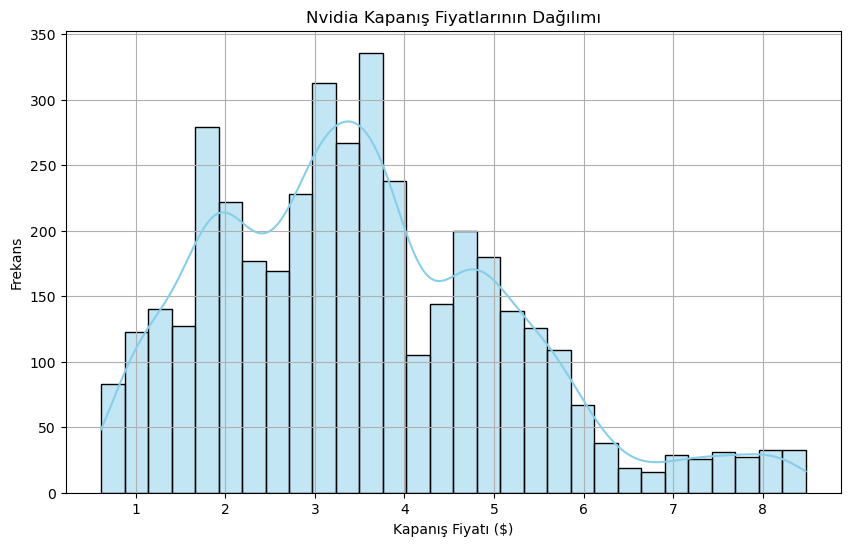

In [24]:
# Fiyatların dağılımı histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Nvidia Kapanış Fiyatlarının Dağılımı')
plt.xlabel('Kapanış Fiyatı ($)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


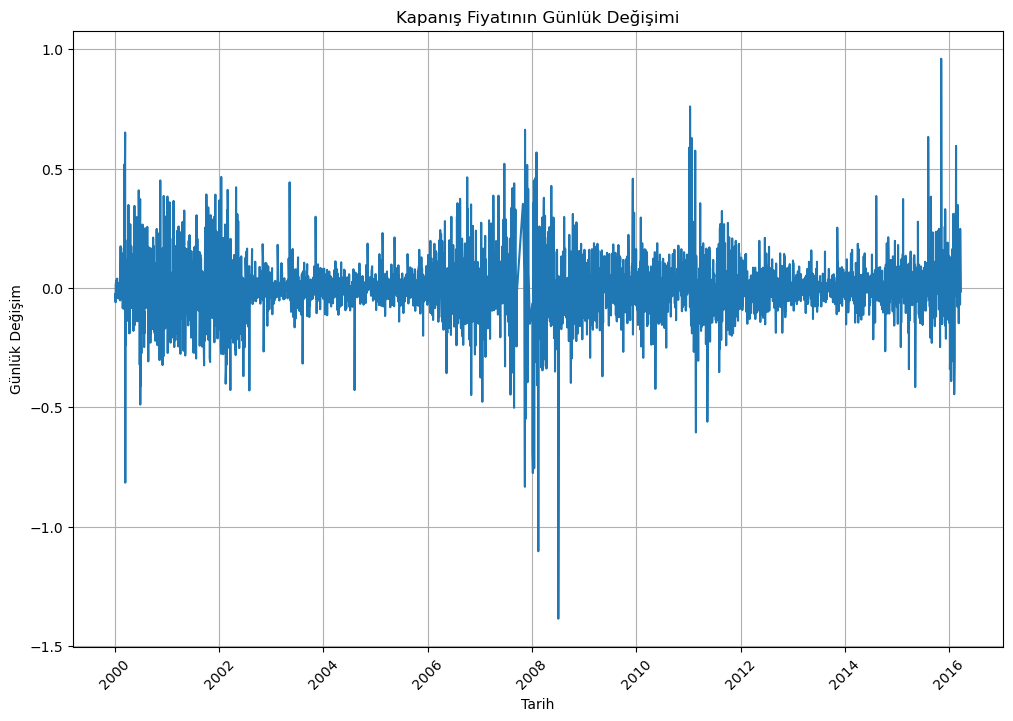

In [26]:
# Kapanış Fiyatının Günlük Değişim Grafiği
plt.figure(figsize=(12, 8))  # Figür boyutunu belirleme
df['Daily Change'] = df['Close'].diff()  # Günlük değişimi hesaplama
sns.lineplot(data=df, x='Date', y='Daily Change')  # Çizgi grafiği oluşturma
plt.xlabel('Tarih')  # X ekseni etiketini belirleme
plt.ylabel('Günlük Değişim')  # Y ekseni etiketini belirleme
plt.title('Kapanış Fiyatının Günlük Değişimi')  # Grafiğin başlığını belirleme
plt.xticks(rotation=45)  # X ekseni etiketlerini 45 derece döndürme
plt.grid(True)  # Izgara eklemek
plt.show()  # Grafiği görüntüleme
